In [86]:
# for data science
import pandas as pd
import numpy as np

# for network science
import networkx as nx
from networkx.algorithms import bipartite

# for string to list conversion
import ast

# for visualization
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 
from scipy.sparse import csr_matrix

In [87]:
data = 'data/blog/article_categories.csv'

blog_df = pd.read_csv(data)
blog_df.reset_index(inplace=True)
blog_df.columns = ['day', 'file', 'text', 'categories']
blog_df['day'] = blog_df['day'] + 1
blog_df['categories'] = blog_df['categories'].apply(ast.literal_eval)
blog_df

# literally, all of the text of my entire blog is in this dataset

,day,file,text,categories
0,1,/work/blog_data/137281311.welcome-to-day-1-of-...,Hello everyone! Welcome to day 1 of the 2023 e...,"[Artificial Intelligence and Machine Learning,..."
1,2,/work/blog_data/137283125.day-2-of-100daysofne...,Welcome to day 2 of #100days of networks. If y...,"[Community Detection, Graph Algorithms, Graph ..."
2,3,/work/blog_data/137309533.day-3-of-100daysofne...,Welcome to day 3 of #100days of networks. If y...,"[Community Detection, Graph Algorithms, Graph ..."
3,4,/work/blog_data/137309643.day-4-of-100daysofne...,Welcome to day 4 of #100days of networks. If y...,"[Attack Simulation, Community Detection, Egoce..."
4,5,/work/blog_data/137309753.day-5-of-100daysofne...,Welcome to day 5 of 100 Days of Networks!Wikip...,"[Artificial Intelligence and Machine Learning,..."
5,6,/work/blog_data/137309849.day-6-of-100daysofne...,If you would like to learn more about networks...,"[Artificial Intelligence and Machine Learning,..."
6,7,/work/blog_data/137311107.day-7-of-100daysofne...,If you would like to learn more about networks...,"[Artificial Intelligence and Machine Learning,..."
7,8,/work/blog_data/137311139.day-8-of-100daysofne...,Welcome to day 8 of #100daysofnetworks!If you ...,"[Artificial Intelligence and Machine Learning,..."
8,9,/work/blog_data/137334639.day-9-of-100daysofne...,If you would like to learn more about networks...,"[Graph Algorithms, Graph Visualization, Subgra..."
9,10,/work/blog_data/137363842.day-10-of-100daysofn...,If you would like to learn more about networks...,"[Artificial Intelligence and Machine Learning,..."


# Days and Subtopics

In [88]:
day_df = blog_df[['day', 'categories']].explode('categories')
day_df.reset_index(drop=True, inplace=True)
day_df.columns = ['day', 'topic']
day_df

,day,topic
0,1,Artificial Intelligence and Machine Learning
1,1,Community Detection
2,1,Egocentric Network Analysis
3,1,Graph Algorithms
4,1,Graph Visualization
...,...,...
212,44,Artificial Intelligence and Machine Learning
213,45,Artificial Intelligence and Machine Learning
214,45,Community Detection
215,45,Egocentric Network Analysis


# Subtopics and Days

In [89]:
topics = sorted(set(day_df['topic']))
topics

['Artificial Intelligence and Machine Learning',
 'Artificial Life',
 'Attack Simulation',
 'Community Detection',
 'Egocentric Network Analysis',
 'Graph Algorithms',
 'Graph Visualization',
 'Subgraphs and Connected Components',
 'Temporal Network Analysis',
 'Whole Network Analysis']

In [90]:
for topic in topics:
    
    print(topic)
    
    days = sorted(day_df[day_df['topic'] == topic]['day'])
    print(days)
    print()

Artificial Intelligence and Machine Learning
[1, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 43, 44, 45]

Artificial Life
[19, 27, 28, 29, 40]

Attack Simulation
[4, 13, 22, 23, 24]

Community Detection
[1, 2, 3, 4, 6, 8, 12, 17, 24, 25, 26, 27, 28, 29, 30, 33, 34, 41, 45]

Egocentric Network Analysis
[1, 4, 5, 8, 12, 13, 14, 16, 17, 18, 19, 21, 24, 27, 28, 31, 33, 34, 37, 40, 41, 42, 45]

Graph Algorithms
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 15, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 37, 40]

Graph Visualization
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 35, 36, 37, 39, 40, 41, 42, 45]

Subgraphs and Connected Components
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 18, 19, 21, 22, 23, 24, 26, 27, 29, 33, 34, 35, 37, 41, 42]

Temporal Network Analysis
[4, 13, 27, 28, 29, 30, 43]

Whole Network Analysis
[2, 3, 4, 5, 6, 7, 8, 9, 1

# Bipartite Projection
Let's explore the bipartite graph a bit, and save a file so that we can explore it in Cosmograph as well.

In [91]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

    adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
    adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
    
    names = np.array(list(G.nodes))
    
    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency)

    if show_names:
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    
    else:
        
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
    
    return SVG(image)

In [92]:
day_df.head()

,day,topic
0,1,Artificial Intelligence and Machine Learning
1,1,Community Detection
2,1,Egocentric Network Analysis
3,1,Graph Algorithms
4,1,Graph Visualization


In [103]:
day_df['topic'].value_counts()

topic
Graph Visualization                             39
Artificial Intelligence and Machine Learning    33
Graph Algorithms                                30
Whole Network Analysis                          29
Subgraphs and Connected Components              27
Egocentric Network Analysis                     23
Community Detection                             19
Temporal Network Analysis                        7
Attack Simulation                                5
Artificial Life                                  5
Name: count, dtype: int64

In [104]:
# bipartite graph
B = nx.from_pandas_edgelist(day_df, source='day', target='topic')

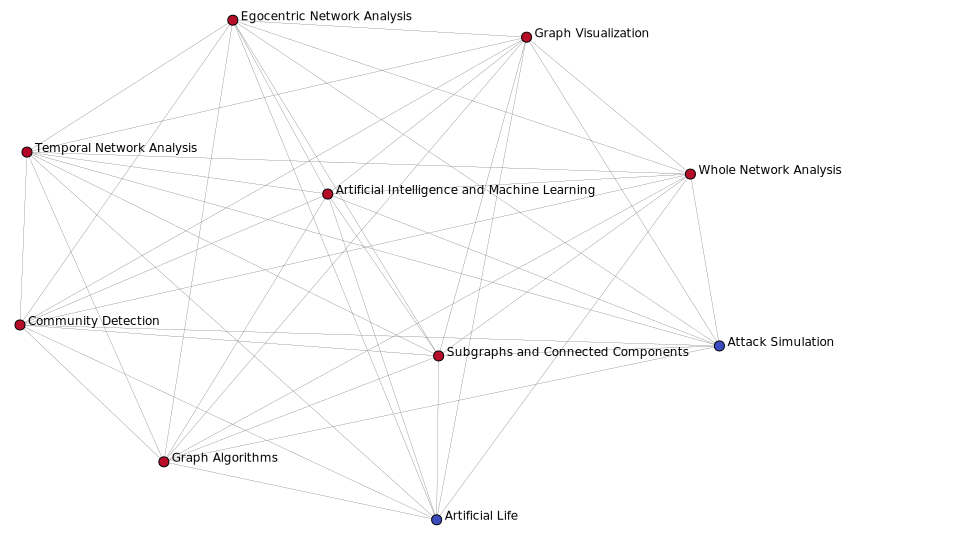

In [105]:
# bipartite projection into a graph
G = bipartite.projected_graph(B, day_df['topic'])

draw_graph(G, show_names=True, node_size=5, edge_width=0.2, font_size=12)

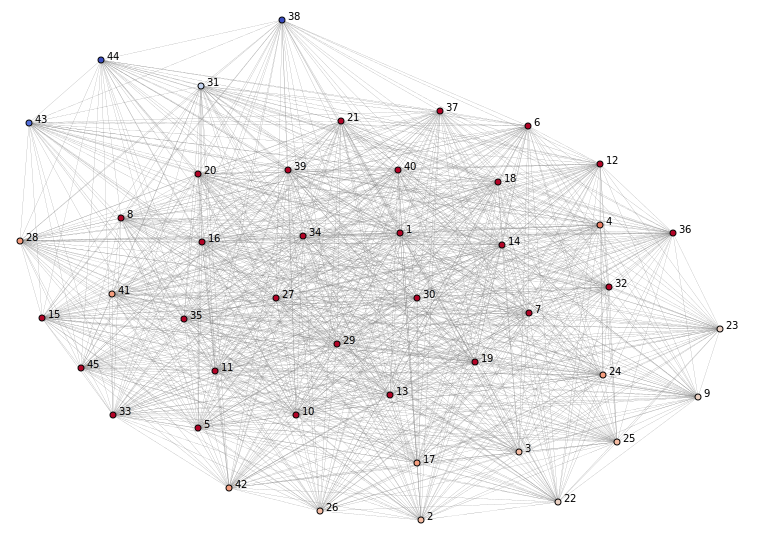

In [106]:
G = bipartite.projected_graph(B, day_df['day'])

draw_graph(G, show_names=True, node_size=3, edge_width=0.1)

In [107]:
centrality_df = pd.DataFrame([nx.degree_centrality(G)]).T
centrality_df.columns = ['score']
centrality_df.sort_values('score', ascending=True).head(10)

# least connected pages

,score
44,0.727273
38,0.727273
43,0.750000
31,0.840909
23,0.886364
22,0.886364
9,0.886364
2,0.909091
3,0.909091
25,0.909091


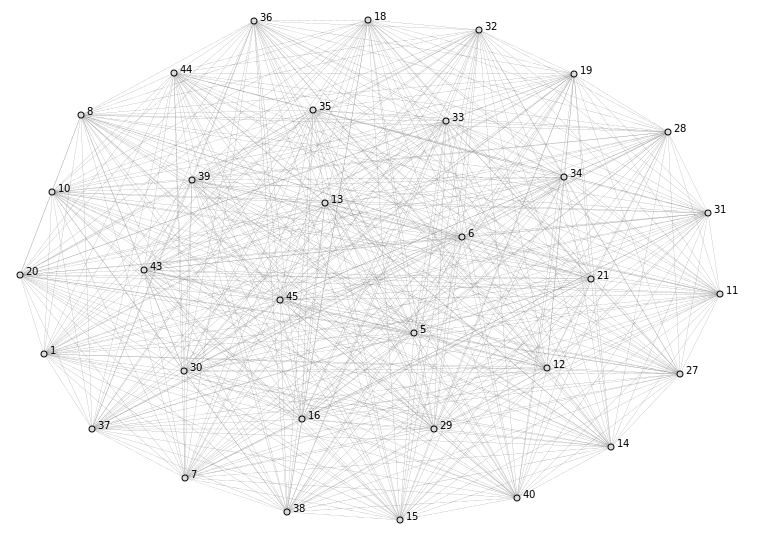

In [108]:
ego = nx.ego_graph(G, 38)

draw_graph(ego, show_names=True, node_size=3, edge_width=0.1)

In [109]:
blog_df[blog_df['day']==38]

,day,file,text,categories
37,38,/work/blog_data/150185262.day-38-of-100daysofn...,I’m really excited to write this entry for #10...,[Artificial Intelligence and Machine Learning]


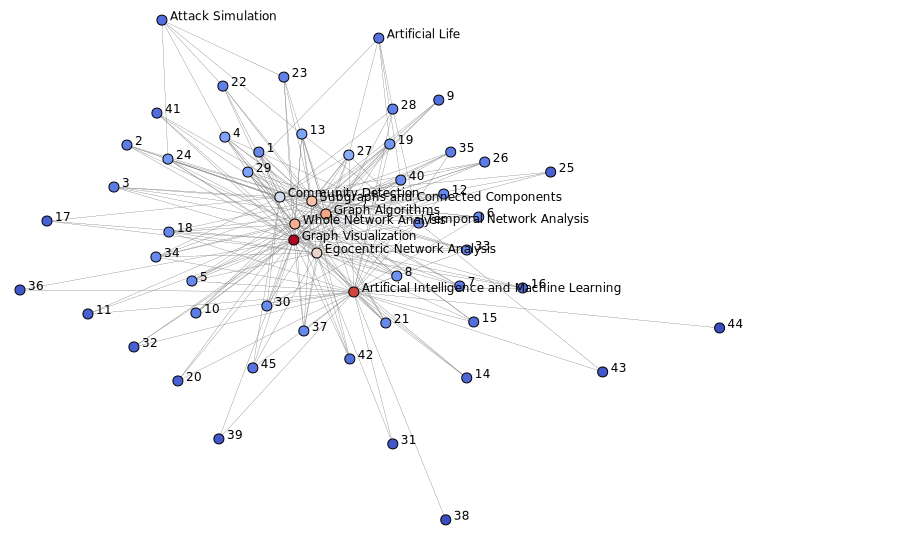

In [116]:
# in this case, bipartite projection was too dense to be useful
# looking at the ego graphs will be revealing enough

draw_graph(B, show_names=True, node_size=5, edge_width=0.2, font_size=12)

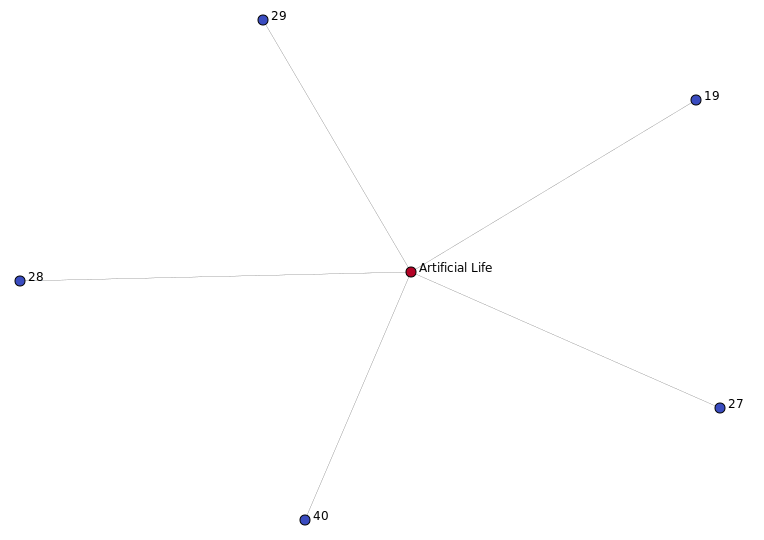

In [119]:
ego = nx.ego_graph(B, 'Artificial Life')

draw_graph(ego, show_names=True, node_size=5, edge_width=0.2, font_size=12)

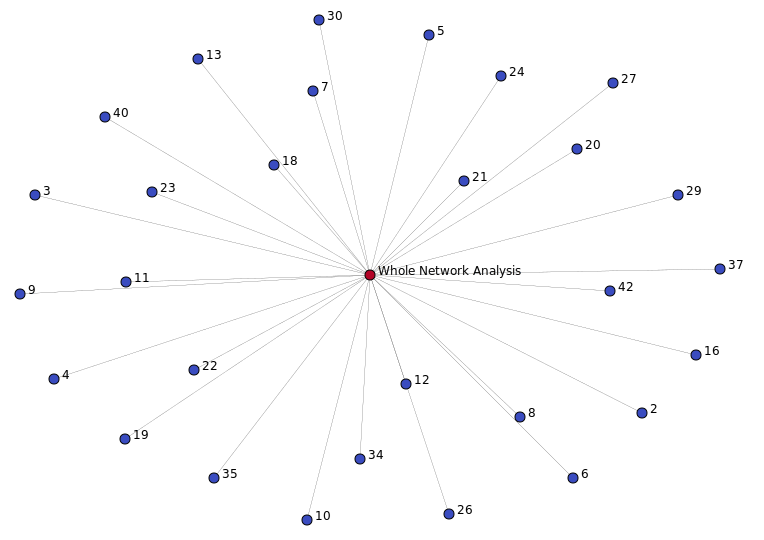

In [120]:
ego = nx.ego_graph(B, 'Whole Network Analysis')

draw_graph(ego, show_names=True, node_size=5, edge_width=0.2, font_size=12)

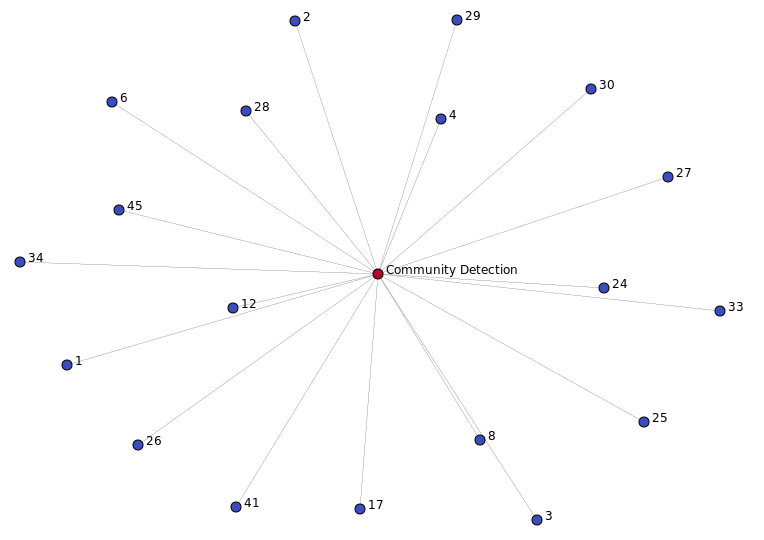

In [122]:
ego = nx.ego_graph(B, 'Community Detection')

draw_graph(ego, show_names=True, node_size=5, edge_width=0.2, font_size=12)

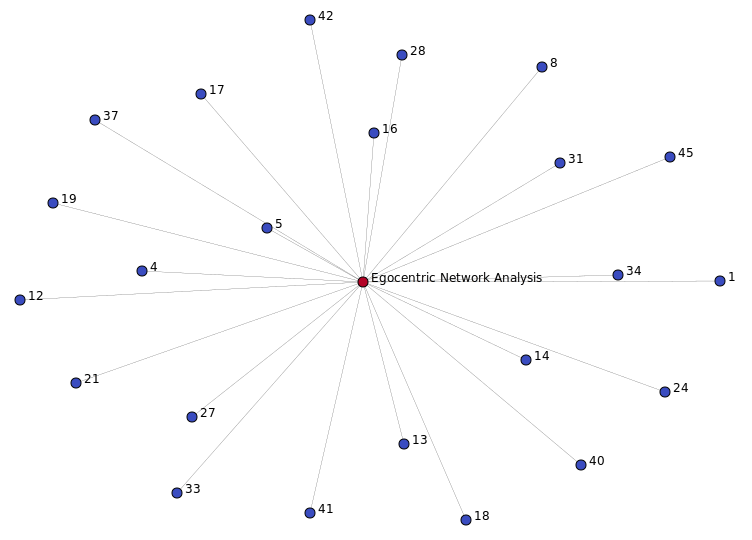

In [123]:
ego = nx.ego_graph(B, 'Egocentric Network Analysis')

draw_graph(ego, show_names=True, node_size=5, edge_width=0.2, font_size=12)

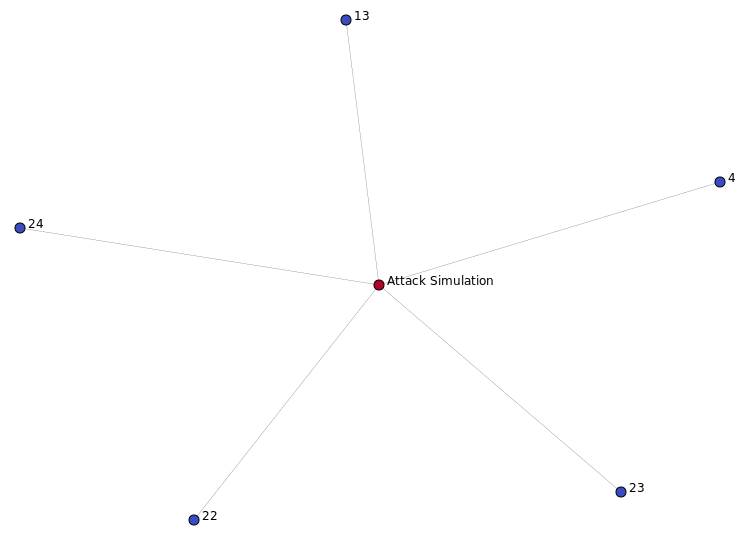

In [121]:
ego = nx.ego_graph(B, 'Attack Simulation')

draw_graph(ego, show_names=True, node_size=5, edge_width=0.2, font_size=12)

# Alice Datasets

I have also been working on some AI generated edgelists using my new "Text to Edgelist" tool. I will talk more about it. You can explore these graphs. Build a graph using 'source' and 'target' This is more data to play with and explore.

In [25]:
data = 'data/genai/alice_combined_edgelist_gpt4.csv'
data = 'data/genai/alice_combined_edgelist_gpt5.csv'
data = 'data/genai/alice_edgelist_gpt4.csv'
data = 'data/genai/alice_edgelist_gpt5.csv'
data = 'data/genai/looking_glass_edgelist_gpt4.csv'
data = 'data/genai/looking_glass_edgelist_gpt5.csv'

df = pd.read_csv(data)
df

,idx,source,target,reasoning,support_text
0,0,Alice,Kitty,"Alice scolds, kisses, and talks at length to K...","Oh, you wicked little thing! cried Alice, catc..."
1,1,Alice,Dinah,Alice reproaches Dinah for not teaching Kitty ...,"Really, Dinah ought to have taught you better ..."
2,2,Dinah,Kitty,Dinah had washed Kitty’s face earlier that mor...,you squeaked twice while Dinah was washing you...
3,3,Dinah,Snowdrop,"Dinah was washing Snowdrop, the white kitten’s...",the white kitten had been having its face wash...
4,4,Alice,Snowdrop,Alice mentions Snowdrop while listing Kitty’s ...,you pulled Snowdrop away by the tail just as I...
...,...,...,...,...,...
155,155,Alice,Her Sister,Alice later explains the incident to her sister.,"she said, when she was explaining the thing af..."
156,156,Kitty,Snowdrop,Both kittens are present and watched together ...,"Snowdrop, my pet!... By the way, Kitty"
157,157,Her Sister,Red Queen,"While speaking to her sister, Alice says the k...",she was explaining the thing afterwards to her...
158,158,Her Sister,Kitty,Alice tells her sister that the kitten (Kitty)...,"it wouldn’t look at it, she said... to her sister"


In [61]:
G = nx.from_pandas_edgelist(df)
print(G)

Graph with 53 nodes and 115 edges


In [62]:
sorted(G.nodes)

['A Daisy',
 'A Knight',
 'Alice',
 'Another Daisy',
 'Bandersnatch',
 'Beamish Boy',
 'Beetle',
 'Bread-And-Butterfly',
 'Dash',
 'Dinah',
 'Fawn',
 'Frog',
 'Gentleman In White Paper',
 'Gnat',
 'Goat',
 'Guard',
 'Haigha',
 'Hatta',
 'Her Nurse',
 'Her Sister',
 'Horse',
 'Humpty Dumpty',
 'Jabberwock',
 'Jubjub Bird',
 'Judy',
 "King's Messenger",
 'Kitty',
 'Larkspur',
 'Lily',
 'Lion',
 'Other White Knight',
 'Punch',
 'Red King',
 'Red Knight',
 'Red Queen',
 'Rocking-Horse-Fly',
 'Rose',
 'Sheep',
 'Snap-Dragon-Fly',
 'Snowdrop',
 'The Carpenter',
 'The Eldest Oyster',
 'The Father',
 'The Red Queen',
 'The Walrus',
 'Tiger-Lily',
 'Tweedledee',
 'Tweedledum',
 'Unicorn',
 'Violet',
 'White King',
 'White Knight',
 'White Queen']